# **Analiza azijskih letališč**
#### Projektna naloga iz analize podatkov pri predmetu Uvod v programiranje

<div class="alert alert-block alert-warning">
<b>Pomni:</b> Ta projektna naloga naj služi le informativnim namenom
</div>

***

Vsi podatke, ki jih bo ta analiza pokrivala (okvirno 11600), so bili vzeti iz spletne strani: __[ourairports.com](https://ourairports.com/continents/AS/airports.html)__ in widgeta spletne strani __[avionio.com](https://www.avionio.com)__. 
Podatke sem, s pomočjo `Acquiring_treasure.py`, shranil v csv datoteko, imenovano `Ogromna_tabela.csv`. 

Pred zajemom podatkov sem postavil nekaj hipotez, in vprašanj, na katera bomo skušali odgovoriti:
> * katere države imajo največ letališč
> * katere države imajo največ zaprtih letališč
> * katere države imajo največ prihodov skupaj
> * letališča z največ prihodi bodo uporabljala tudi največ letalskih družb
> * katera letališča bodo imela največjo in najmanjšo zamudo? Hipoteza: letališča z najmanj prihodi bodo imela največjo in najmanjšo povprečno zamudo.
> * katere so najpopularnejše letalske družbe v aziji


***

### Priprava

Najprej bomo uvozili knjižnico __Pandas__, s katero bomo izvedli analizo podatkov. Uvozili in prebrali bomo še datoteko s shranjenimi letališči `Ogromna_tabela.csv`. Za risanje nekaterih grafov bomo uporabili tudi knjižnico __matplotlib.pyplot__.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import Supporting_char as sup

pd.set_option("display.max_rows", 12)

seznam = sup.seznam



In [32]:
letalisca = pd.read_csv("CSVing/Ogromna_tabela.csv")
letalisca

,Ime letališča,Država,Tip letališča,Število prihodov,Destinacije,Število destinacij,Letalske družbe,Število let. družb,Povprečna zamuda letov
0,Dubai International Airport,United Arab Emirates,Major airport,606,"['Abha', 'Accra', 'Addis Ababa', 'Ahmedabad', ...",203,"['AJet', 'AZAL Azerbaijan Airlines', 'Aegean A...",84,21 minut
1,Singapore Changi Airport,Singapore,Major airport,544,"['Abu Dhabi', 'Adelaide', 'Ahmedabad', 'Amrits...",121,"['ASIANA AIRLINES INC.', 'Aero Dili', 'AeroLog...",92,17 minut
2,Narita International Airport,Japan,Major airport,417,"['Abu Dhabi', 'Amami', 'Amsterdam', 'Anchorage...",108,"['ASIANA AIRLINES INC.', 'Aero K', 'Aeromexico...",97,19 minut
3,Hong Kong International Airport,Hong Kong,Major airport,571,"['Abu Dhabi', 'Addis Ababa', 'Almaty', 'Amster...",116,"['9 Air Co', 'ASIANA AIRLINES INC.', 'ASL Airl...",94,25 minut
4,Suvarnabhumi Airport,Thailand,Major airport,585,"['Abu Dhabi', 'Addis Ababa', 'Ahmedabad', 'Alm...",126,"['9 Air Co', 'ASIANA AIRLINES INC.', 'Aeroflot...",119,17 minut
5,Beijing Capital International Airport,China,Major airport,655,"['Addis Ababa', 'Almaty', 'Amsterdam', 'Anqing...",160,"['ASIANA AIRLINES INC.', 'Air Astana', 'Air Ch...",47,23 minut
6,Kuala Lumpur International Airport,Malaysia,Major airport,556,"['Abu Dhabi', 'Adelaide', 'Ahmedabad', 'Alor S...",105,"['Air Arabia', 'Air China', 'Air India', 'Air ...",52,21 minut
7,Incheon International Airport,South Korea,Major airport,613,"['Abu Dhabi', 'Addis Ababa', 'Almaty', 'Amster...",137,"['ASIANA AIRLINES INC.', 'Aero K', 'Aero Mongo...",91,21 minut


## Analiza podatkov

Najprej si oglejmo, katere države imajo največ letališč in katere največ letov, če združimo lete iz vseh letališč države.

In [33]:
po_drzavah = pd.read_csv("CSVing/Supporting.csv")
po_številu_letališč = po_drzavah.sort_values(by="Število letališč", ascending=False)
po_številu_letališč

,Država,Število letališč,Število prihodov
0,United Arab Emirates,1,606
1,Singapore,1,544
2,Japan,1,417
3,Hong Kong,1,571
4,Thailand,1,585
5,China,1,655
6,Malaysia,1,556
7,South Korea,1,613


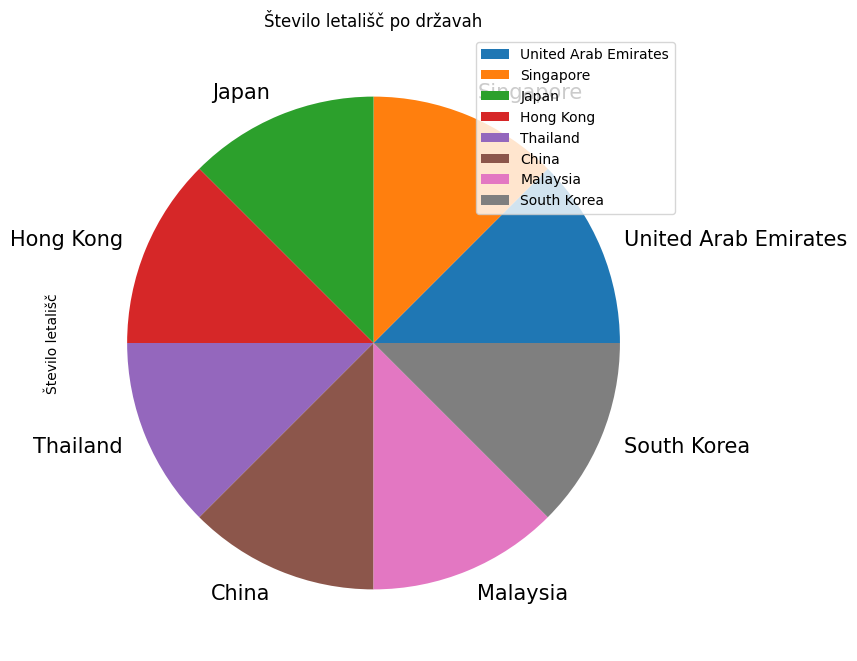

In [34]:
število_letališč = po_drzavah.set_index("Država").plot(kind='pie', figsize=(8, 8), fontsize=15, y="Število letališč", title="Število letališč po državah")

In [35]:
po_številu_letov = po_drzavah.sort_values(by="Število prihodov", ascending=False)
po_številu_letov

,Država,Število letališč,Število prihodov
5,China,1,655
7,South Korea,1,613
0,United Arab Emirates,1,606
4,Thailand,1,585
3,Hong Kong,1,571
6,Malaysia,1,556
1,Singapore,1,544
2,Japan,1,417


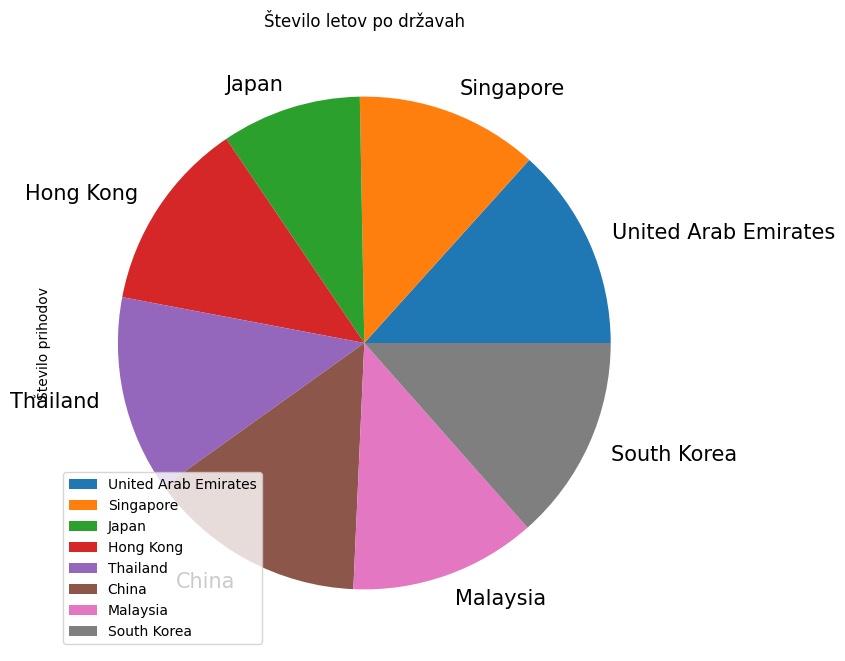

In [36]:
število_letov = po_drzavah.set_index("Država").plot(kind='pie', figsize=(8, 8), fontsize=15, y="Število prihodov", title="Število letov po državah")

Oglejmo si še, katere države imajo največ zaprtih letališč. Želimo izvedeti, ali ta tabela sovpada s prejšnjo.

In [37]:
zaprta_letalisca = sup.st_zaprtih_letalisc(seznam)
zaprtost_po_drzavah = pd.DataFrame(list(zaprta_letalisca.items()), columns=['Država', 'št_zaprtih_letališč']).sort_values(by="št_zaprtih_letališč")
zaprtost_po_drzavah

,Država,št_zaprtih_letališč


Potovanja, ki vsebujejo nekakšno pot z letalom, se po navadi zavlečejo zaradi nepredvidene zamude leta. Velikokrat si letališča ne moremo izbirati na podlagi povprečne zamude, a si še vedno lahko pogledamo, katera letališča so prijazna potnikom in katera jim povzročajo gubasta čela.

In [38]:
zamude = letalisca[["Ime letališča", "Povprečna zamuda letov"]].sort_values(by="Povprečna zamuda letov")
zamude

,Ime letališča,Povprečna zamuda letov
1,Singapore Changi Airport,17 minut
4,Suvarnabhumi Airport,17 minut
2,Narita International Airport,19 minut
0,Dubai International Airport,21 minut
6,Kuala Lumpur International Airport,21 minut
7,Incheon International Airport,21 minut
5,Beijing Capital International Airport,23 minut
3,Hong Kong International Airport,25 minut


Zelo intuitivno bi bilo misliti, da bi imela letališča z največ prihodi tudi največje število letalskih družb. Pa je res tako?

In [39]:
let_druzbe = letalisca[["Ime letališča", "Število prihodov", "Število let. družb"]].sort_values(by="Število let. družb", ascending=False)
let_druzbe

,Ime letališča,Število prihodov,Število let. družb
4,Suvarnabhumi Airport,585,119
2,Narita International Airport,417,97
3,Hong Kong International Airport,571,94
1,Singapore Changi Airport,544,92
7,Incheon International Airport,613,91
0,Dubai International Airport,606,84
6,Kuala Lumpur International Airport,556,52
5,Beijing Capital International Airport,655,47


Poglejmo si korelacijo na bolj nazoren način

<Axes: xlabel='Število let. družb', ylabel='Število prihodov'>

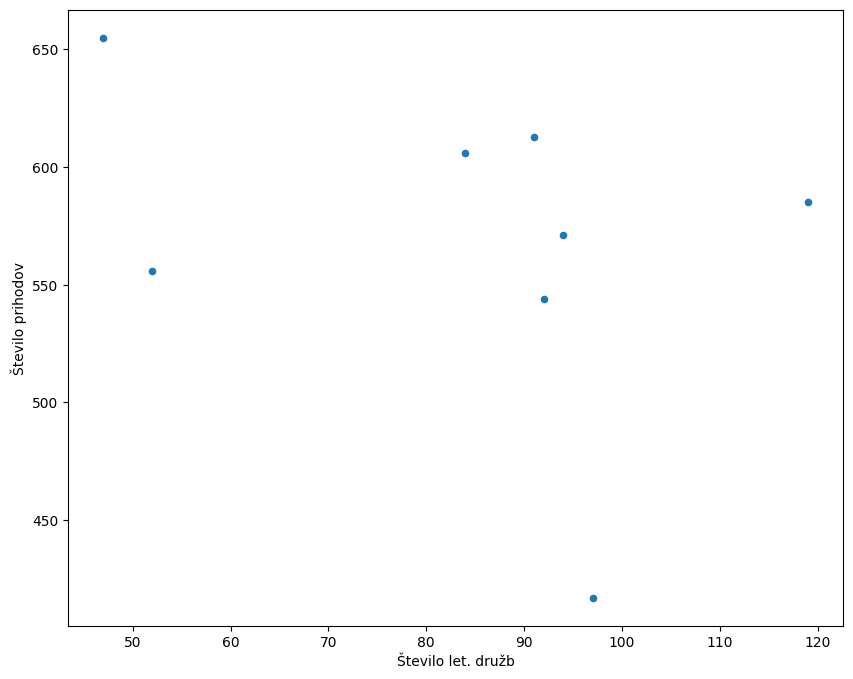

In [40]:
pikcasti_graf = let_druzbe.plot.scatter("Število let. družb", "Število prihodov", figsize=(10, 8))
pikcasti_graf

## Ugotovitve

Najprej se vrnimo na začetne hipoteze in vprašanja:
>* Največ letališč ima ___________
>* Največ zaprtih letališč ima ___________
>* Največ prihodov skupaj ima ___________
>* 